# <p align="center">Hotel Customer Segmentation</p>

---

## <p align="center">*2 - Clustering*</p>

---

### 👥 **Team Members**
- **Ana Farinha** *(Student Number: 20211514)*  
- **António Oliveira** *(Student Number: 20211595)*  
- **Mariana Neto** *(Student Number: 20211527)*  
- **Salvador Domingues** *(Student Number: 20240597)*  

📅 **Date:** *March 10, 2025*  
📍 **Prepared for:** *Hotel H*  

---

# ToC

<a class="anchor" id="top"></a>


1. [Import Libraries & Data](#1.-Import-Libraries-&-Data) <br><br>

2. ["Regular" Clustering](#2.-"Regular"-Clustering)<br>
    
    2.1 [K-Means](#2.1-K-Means) <br>
    
    2.2 [DBSCAN](#2.2-DBSCAN) <br><br>
    
3. [Clustering with Dimensionality Reduction](#3.-Clustering-with-Dimensionality-Reduction)<br>

    3.1 [Principal Components Analysis](#3.1-Principal-Components-Analysis) <br>
    
    3.2 [K-Means](#3.2-K-Means) <br>
    
    3.3 [DBSCAN](#3.3-DBSCAN) <br><br>
 

# 1. Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np

# Clustering Algorithms
from sklearn.cluster import DBSCAN, MeanShift, KMeans, \
    AgglomerativeClustering, estimate_bandwidth
from sklearn.decomposition import PCA
import umap.umap_ as umap
from sklearn.neighbors import NearestNeighbors

# Scaling
from sklearn.preprocessing import MinMaxScaler

# Visualisations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer

# External Functions File
import functions as f

pd.set_option('display.max_columns', None)

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

**Data**

In [2]:
df = pd.read_csv('./treated_data.csv', index_col = 'Unnamed: 0')
df

Age  DaysSinceCreation  AverageLeadTime  LodgingRevenue  \
0       60.0              480.0             64.0           495.0   
1       54.0             1197.0             14.0           695.0   
4       53.0              755.0             56.0           165.0   
6       33.0              673.0              2.0           237.0   
7       31.0               94.0            179.0           168.0   
...      ...                ...              ...             ...   
107621  22.0              159.0             69.0           212.0   
107622  54.0              209.0             83.0           256.5   
107624  41.0              783.0             58.0           218.0   
107625  19.0               46.0             89.0           911.7   
107627  60.0               55.0            176.0           730.8   

        OtherRevenue  BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  \
0              162.0               0.0               0.0                2.0   
1              100.0               0.0               0.0                1.0   
4               12.0               0.0               0.0                1.0   
6               71.6               0.0               0.0                1.0   
7               66.0               0.0               0.0                1.0   
...              ...               ...               ...                ...   
107621          32.0               0.0               0.0                1.0   
107622          74.4               0.0               0.0                1.0   
107624          14.0               0.0               0.0                1.0   
107625          31.0               0.0               0.0                1.0   
107627          96.0               0.0               0.0                1.0   

        PersonsNights  RoomNights  SRHighFloor  SRCrib  SRKingSizeBed  \
0                 6.0         3.0            0       0              1   
1                10.0         5.0            1       0              1   
4                 3.0         1.0            0       0              0   
6                 3.0         3.0            0       0              0   
7                 2.0         2.0            0       0              1   
...               ...         ...          ...     ...            ...   
107621            4.0         2.0            0       0              0   
107622            6.0         3.0            0       0              0   
107624            2.0         2.0            0       0              0   
107625           14.0         7.0            0       0              1   
107627           12.0         4.0            0       0              0   

        SRTwinBed  SRQuietRoom  TotalRevenue  RetentionRate  RevenuePerNight  \
0               0            1         657.0            1.0       219.000000   
1               0            0         795.0            1.0       159.000000   
4               0            0         177.0            1.0       177.000000   
6               0            0         308.6            1.0       102.866667   
7               0            0         234.0            1.0       117.000000   
...           ...          ...           ...            ...              ...   
107621          1            0         244.0            1.0       122.000000   
107622          1            0         330.9            1.0       110.300000   
107624          0            0         232.0            1.0       116.000000   
107625          0            0         942.7            1.0       134.671429   
107627          0            0         826.8            1.0       206.700000   

        RevenuePerPersonNight  NumberOfSR  Foreigner  \
0                  109.500000           1          1   
1                   79.500000           2          1   
4                   59.000000           0          1   
6                  102.866667           0          1   
7                  117.000000           1          1   
...                       ...         ...        ...   
107621       

In [3]:
outliers = pd.read_csv('./outliers.csv')
outliers

Age  DaysSinceCreation  AverageLeadTime  LodgingRevenue  OtherRevenue  \
0    24.0              949.0              7.0         9682.40       1300.00   
1    74.0              187.0            197.0          336.00        136.50   
2    56.0              277.0              1.0          390.00       3190.40   
3    41.0             1295.0              6.0         3910.00        433.50   
4    72.0              720.0            574.0          468.00        157.10   
..    ...                ...              ...             ...           ...   
113  50.0              427.0             12.0         6431.00        364.00   
114  41.0              396.0             50.0          288.69        152.07   
115  63.0              723.0            574.0          234.00        300.50   
116  52.0              287.0             59.0          395.00       5237.00   
117  46.0              201.0             10.0           94.00         12.00   

     BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  PersonsNights  \
0                 0.0               0.0                1.0           12.0   
1                 0.0               0.0               15.0           28.0   
2                 0.0               0.0                1.0            5.0   
3                 2.0               1.0               38.0           42.0   
4                 0.0               0.0                1.0           12.0   
..                ...               ...                ...            ...   
113               0.0               0.0                1.0           59.0   
114               1.0               0.0                1.0            6.0   
115               0.0               0.0                1.0            6.0   
116               0.0               0.0                1.0            5.0   
117               1.0               0.0                1.0            1.0   

     RoomNights  SRHighFloor  SRCrib  SRKingSizeBed  SRTwinBed  SRQuietRoom  \
0           6.0            0       0              0          0            0   
1          28.0            0       0              1          0            0   
2           5.0            0       0              0          0            1   
3          42.0            0       0              0          0            0   
4           6.0            0       0              0          0            0   
..          ...          ...     ...            ...        ...          ...   
113        59.0            0       0              0          0            0   
114         3.0            0       0              1          0            1   
115         3.0            0       0              0          0            0   
116         5.0            0       0              0          0            0   
117         1.0            0       0              0          0            0   

     TotalRevenue  RetentionRate  RevenuePerNight  RevenuePerPersonNight  \
0        10982.40       1.000000      1830.400000             915.200000   
1          472.50       1.000000        16.875000              16.875000   
2         3580.40       1.000000       716.080000             716.080000   
3         4343.50       0.926829       103.416667             103.416667   
4          625.10       1.000000       104.183333              52.091667   
..            ...            ...              ...                    ...   
113       6795.00       1.000000       115.169492             115.169492   
114        440.76       0.500000       146.920000              73.460000   
115        534.50       1.000000       178.166667              89.083333   
116       5632.00       1.000000      1126.400000            1126.400000   
117        106.00       0.500000       106.000000             106.000000   

     NumberOfSR  Foreigner  LeadTimeCategory_Last-minute  \
0             0          1                           0.0   
1             1          0                           0.0   
2             0          1                           1.0   
3             0          0    

Removing Columns not relevant for clustering purposes

In [4]:
df.drop(['Age','DaysSinceCreation', 'FlagOutlier', 'LodgingRevenue', 'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'OtherRevenue', 'RetentionRate', 'AverageLeadTime'], axis = 1, inplace = True)

In [4]:
df.drop(['Age', 'FlagOutlier', 'CustomerCategory_New', 'CustomerCategory_Recent', 'RetentionRate'], axis = 1, inplace = True)

In [5]:
df

RoomNights  SRHighFloor  SRCrib  SRKingSizeBed  SRTwinBed  \
0              3.0            0       0              1          0   
1              5.0            1       0              1          0   
4              1.0            0       0              0          0   
6              3.0            0       0              0          0   
7              2.0            0       0              1          0   
...            ...          ...     ...            ...        ...   
107621         2.0            0       0              0          1   
107622         3.0            0       0              0          1   
107624         2.0            0       0              0          0   
107625         7.0            0       0              1          0   
107627         4.0            0       0              0          0   

        SRQuietRoom  TotalRevenue  RevenuePerNight  RevenuePerPersonNight  \
0                 1         657.0       219.000000             109.500000   
1                 0         795.0       159.000000              79.500000   
4                 0         177.0       177.000000              59.000000   
6                 0         308.6       102.866667             102.866667   
7                 0         234.0       117.000000             117.000000   
...             ...           ...              ...                    ...   
107621            0         244.0       122.000000              61.000000   
107622            0         330.9       110.300000              55.150000   
107624            0         232.0       116.000000             116.000000   
107625            0         942.7       134.671429              67.335714   
107627            0         826.8       206.700000              68.900000   

        NumberOfSR  Foreigner  LeadTimeCategory_Last-minute  \
0                1          1                           0.0   
1                2          1                           0.0   
4                0          1                           0.0   
6                0          1                           1.0   
7                1          1                           0.0   
...            ...        ...                           ...   
107621           1          1                           0.0   
107622           1          1                           0.0   
107624           0          1                           0.0   
107625           1          1                           0.0   
107627           0          1                           0.0   

        LeadTimeCategory_Planner  AgeGroup_Senior  AgeGroup_Young  \
0                            0.0              1.0             0.0   
1                            1.0              1.0             0.0   
4                            0.0              1.0             0.0   
6                            0.0              0.0             0.0   
7                            0.0              0.0             0.0   
...                          ...              ...             ...   
107621                       0.0              0.0             1.0   
107622                       0.0              1.0             0.0   
107624                       0.0              0.0             0.0   
107625                       0.0              0.0             1.0   
107627                       0.0              1.0             0.0   

        CustomerCategory_New  CustomerCategory_Recent  Continent_AS  \
0                        0.0                      1.0             0   
1                        0.0                      0.0             0   
4                        0.0                      1.0             0   
6                        0.0                      1.0             0   
7                        1.0                      0.0             0   
...                      ...                      ...           ...   
107621                   1.0                      0.0             0   
107622                   1.0                      0.0             0   
107624                   0.0 

**Scaling**

In [6]:
scaled_data = MinMaxScaler().fit_transform(df)
scaled_data = pd.DataFrame(scaled_data, 
                           columns=df.columns, 
                           index=df.index)

In [7]:
scaled_data.head(3)

RoomNights  SRHighFloor  SRCrib  SRKingSizeBed  SRTwinBed  SRQuietRoom  \
0        0.04          0.0     0.0            1.0        0.0          1.0   
1        0.08          1.0     0.0            1.0        0.0          0.0   
4        0.00          0.0     0.0            0.0        0.0          0.0   

   TotalRevenue  RevenuePerNight  RevenuePerPersonNight  NumberOfSR  \
0      0.076226         0.105730               0.091302        0.25   
1      0.092261         0.076719               0.066211        0.50   
4      0.020451         0.085422               0.049066        0.00   

   Foreigner  LeadTimeCategory_Last-minute  LeadTimeCategory_Planner  \
0        1.0                           0.0                       0.0   
1        1.0                           0.0                       1.0   
4        1.0                           0.0                       0.0   

   AgeGroup_Senior  AgeGroup_Young  CustomerCategory_New  \
0              1.0             0.0                   0.0   
1              1.0             0.0                   0.0   
4              1.0             0.0                   0.0   

   CustomerCategory_Recent  Continent_AS  Continent_EU  Continent_NA  \
0                      1.0           0.0           1.0           0.0   
1                      0.0           0.0           1.0           0.0   
4                      1.0           0.0           1.0           0.0   

   Continent_SA  DC_Corporate  DC_Direct  DC_Travel Agent/Operator  
0           0.0           0.0        1.0                       0.0  
1           0.0           0.0        0.0                       1.0  
4           0.0           0.0        0.0                       1.0

# 2. "Regular" Clustering

<a href="#top">Top &#129033;</a>

## 2.1 K-Means

**Elbow Method**

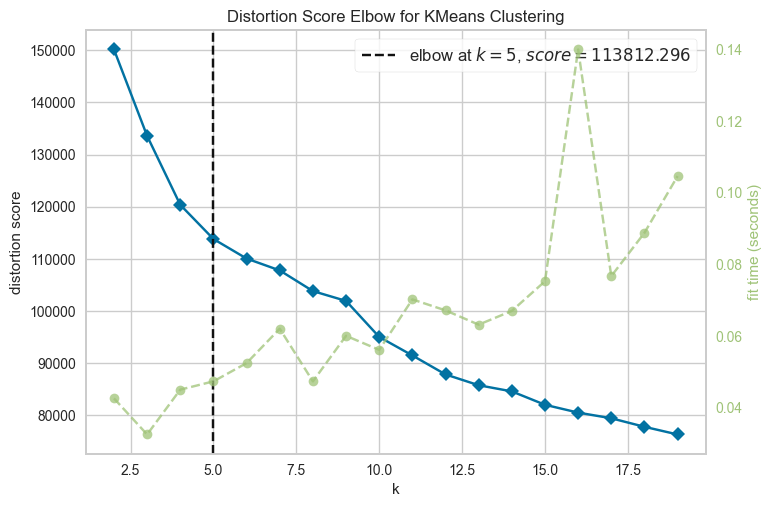

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [143]:
model = KMeans(random_state=136
               )
k=(2, 20)
color = 'green'

visualizer1 = KElbowVisualizer(model, k=k, color=color)
visualizer1.fit(scaled_data)
visualizer1.show()

**Final Model for KM**

In [21]:
kmclust = KMeans(n_clusters = 6, random_state=155)
km_labels = kmclust.fit_predict(scaled_data)

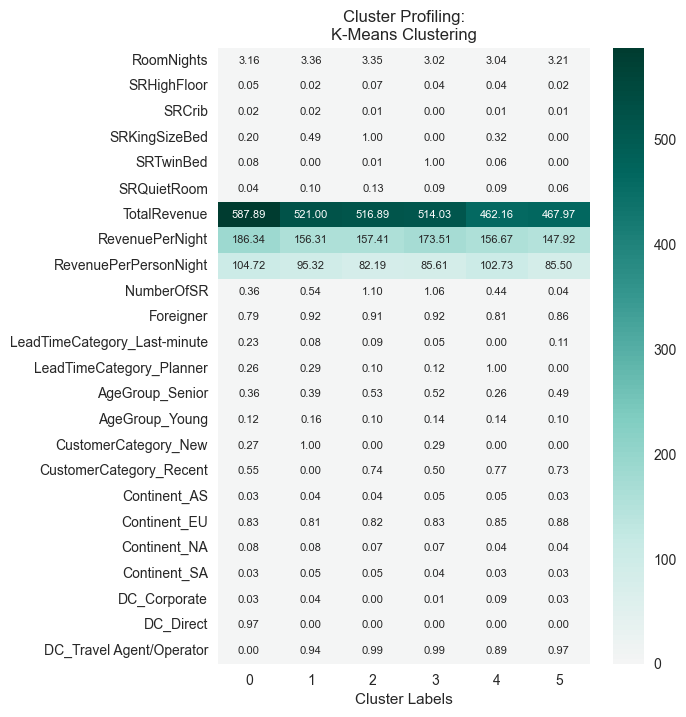

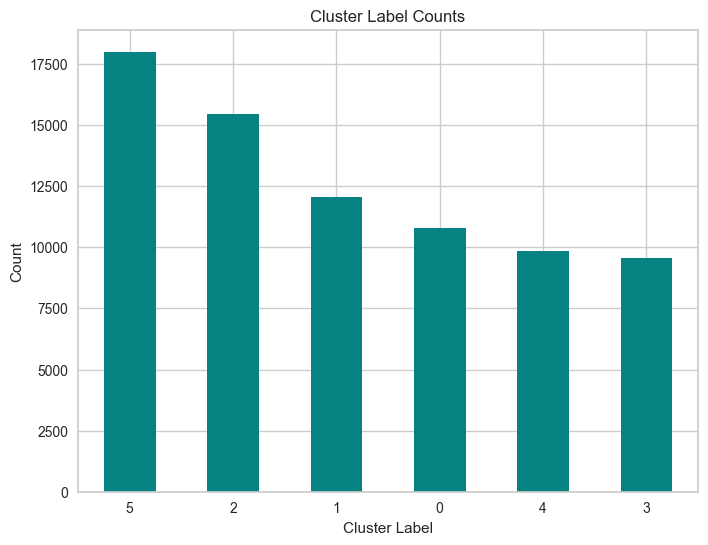

In [22]:
f.plot_cluster_profiling(df, km_labels, "K-Means", annot_size = 8)
f.plot_counts(km_labels)

In [144]:
kmclust = KMeans(n_clusters = 5, random_state=136)
km_labels = kmclust.fit_predict(scaled_data)

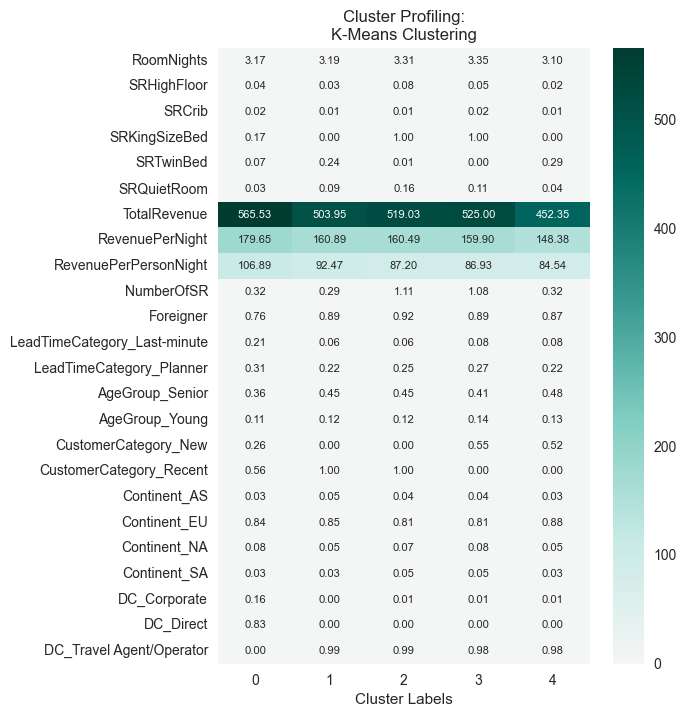

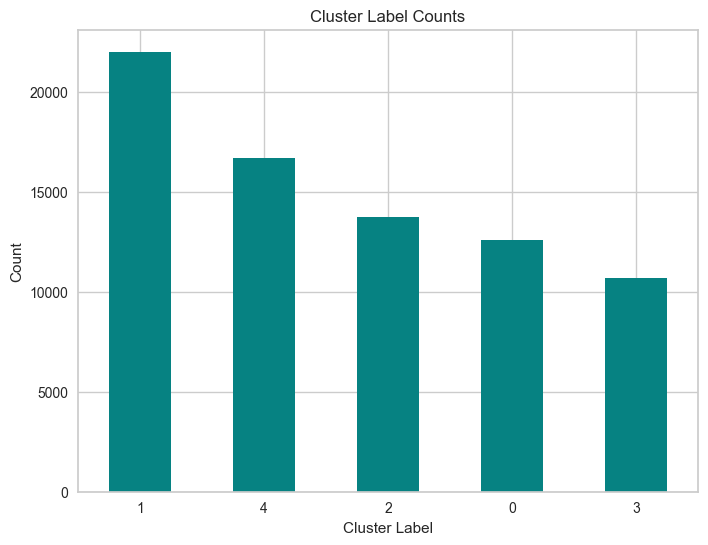

In [145]:
f.plot_cluster_profiling(df, km_labels, "K-Means", annot_size = 8)
f.plot_counts(km_labels)

**UMAP Visualisation**

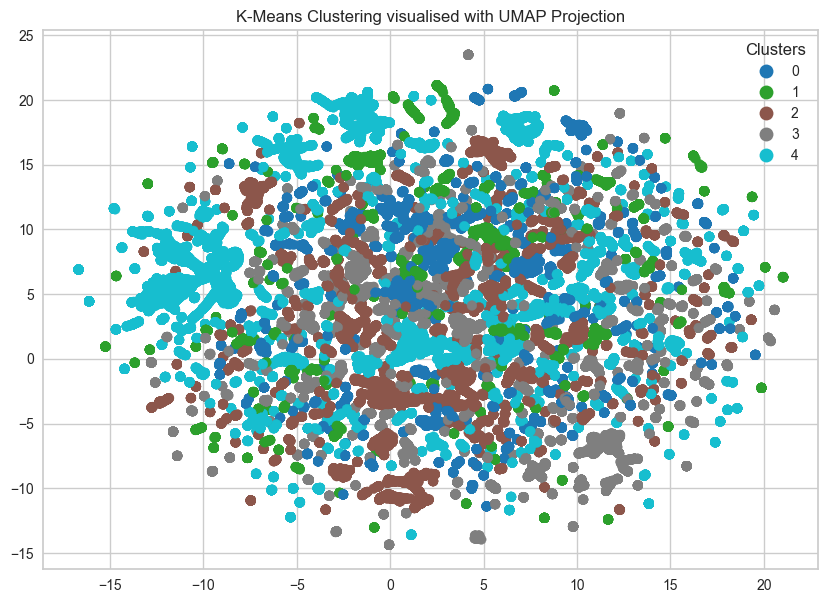

In [18]:
umap_object = umap.UMAP(n_neighbors = 10)
umap_embedding = umap_object.fit_transform(scaled_data)

f.plot_dim_reduction(umap_embedding, targets = km_labels,
                   technique = 'K-Means Clustering visualised with UMAP')

## 2.2 DBSCAN

<a href="#top">Top &#129033;</a>

**K-distance graph**

In [38]:
neigh = NearestNeighbors(n_neighbors=50)
neigh.fit(scaled_data)
distances, _ = neigh.kneighbors(scaled_data)
distances = np.sort(distances[:, -1])

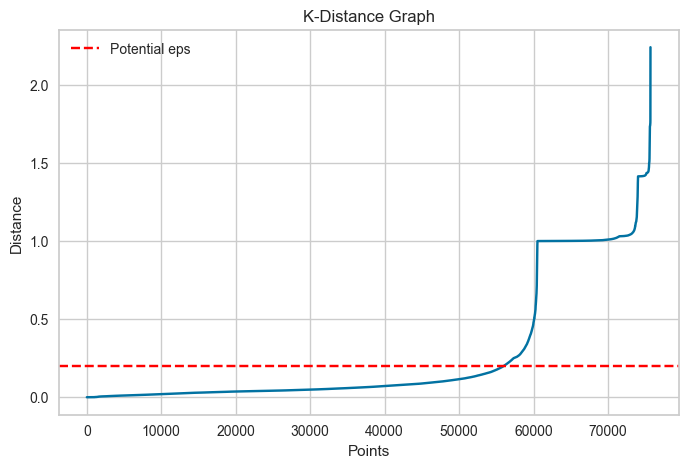

In [45]:
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.axhline(y=0.20, color='red', linestyle='--', label='Potential eps')
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("K-Distance Graph")
plt.legend()
plt.show()

**Final Model for DBSCAN**

In [ ]:
# Perform DBSCAN clustering
eps_value = 1.5
dbscan = DBSCAN(eps=eps_value, min_samples=200)
dbscan_labels = dbscan.fit_predict(scaled_data)

In [61]:
# Number of estimated clusters
n_clusters = len(np.unique(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of estimated clusters: {n_clusters}")

Number of estimated clusters: 1


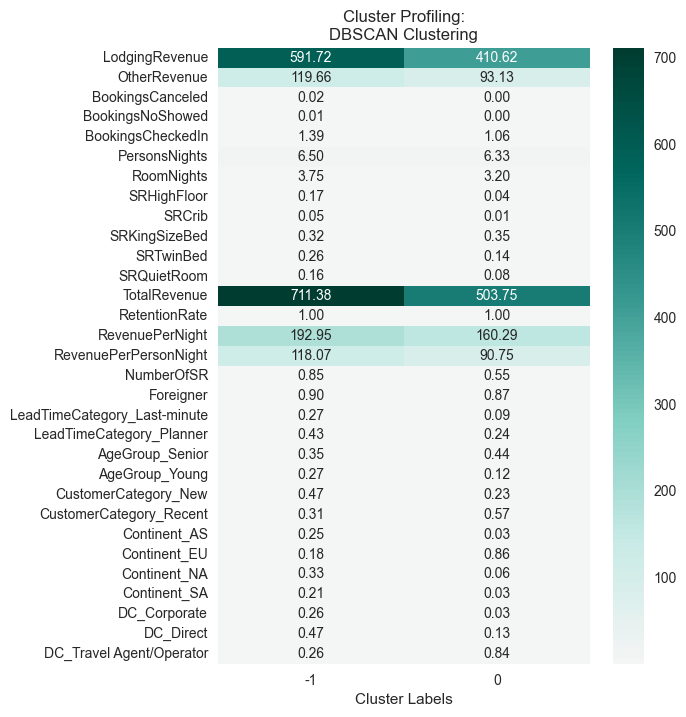

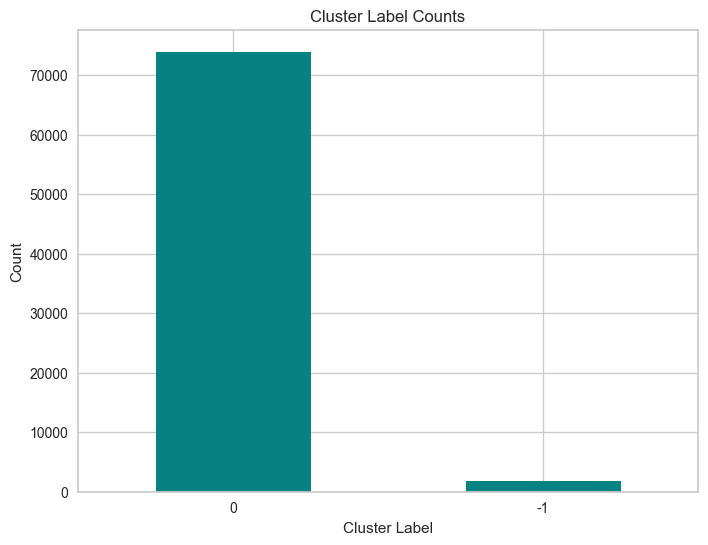

In [58]:
# Profiling and visualization
f.plot_cluster_profiling(df, dbscan_labels, "DBSCAN")
f.plot_counts(dbscan_labels)

**UMAP Visualisation**

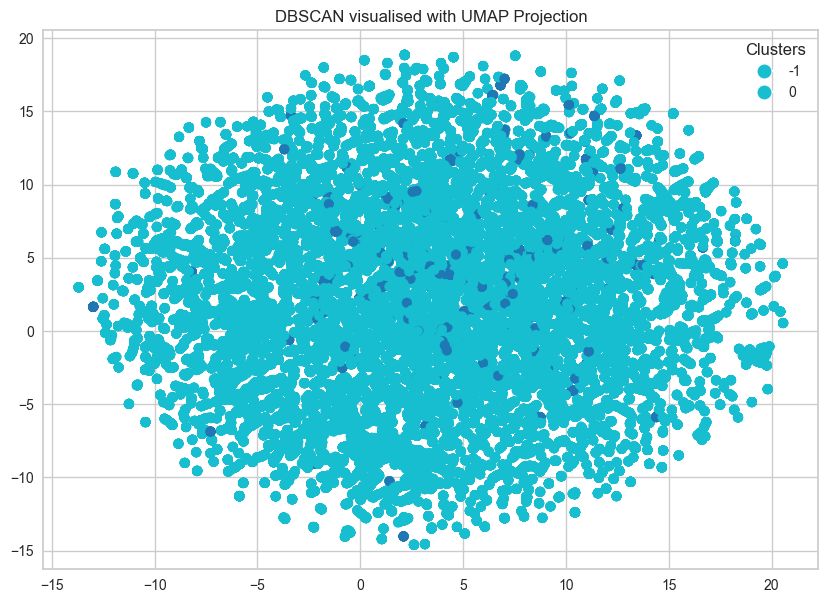

In [59]:
umap_object = umap.UMAP(n_neighbors=5)
umap_embedding = umap_object.fit_transform(scaled_data)

f.plot_dim_reduction(umap_embedding, targets=dbscan_labels, technique='DBSCAN visualised with UMAP')

As DBSCAN identifies *noise* with a -1 label, bellow we can inspect how many observations were identified as such.

In [62]:
outliers = df[dbscan_labels == -1]
print(f"Number of detected outliers: {len(outliers)}")

Number of detected outliers: 11


# 3. Clustering with Dimensionality Reduction

<a href="#top">Top &#129033;</a>

## 3.1 Principal Components Analysis

**Explained Variance vs Number of Components**

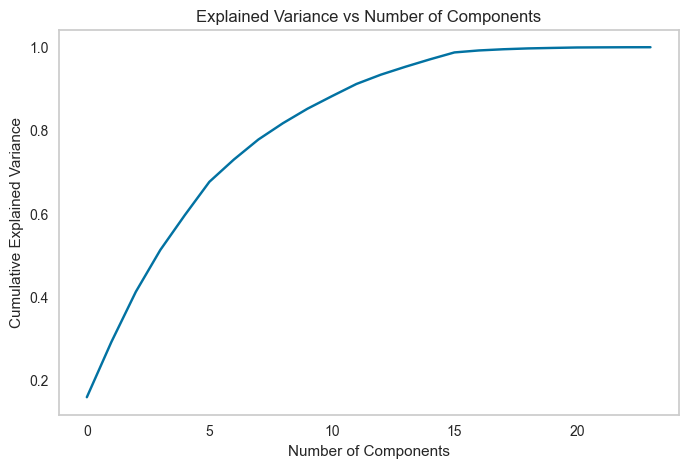

In [146]:
pca_full = PCA()
pca_full.fit(scaled_data)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)


plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.title('Explained Variance vs Number of Components')
plt.show()

In [147]:
# Create DataFrame with all PCs
pcaDF = pd.DataFrame({
    'Component': range(1, len(pca_full.explained_variance_ratio_) + 1),
    'Variance explained': pca_full.explained_variance_ratio_,
    'Cumulative variance explained': np.cumsum(pca_full.explained_variance_ratio_)
})

pcaDF

Component  Variance explained  Cumulative variance explained
0           1            0.157456                       0.157456
1           2            0.132805                       0.290261
2           3            0.121099                       0.411360
3           4            0.100722                       0.512082
4           5            0.083879                       0.595961
5           6            0.079998                       0.675959
6           7            0.053664                       0.729623
7           8            0.048194                       0.777817
8           9            0.039196                       0.817013
9          10            0.034817                       0.851830
10         11            0.030315                       0.882146
11         12            0.029356                       0.911502
12         13            0.022457                       0.933960
13         14            0.019011                       0.952970
14         15            0.017815                       0.970785
15         16            0.016683                       0.987468
16         17            0.004775                       0.992243
17         18            0.002878                       0.995121
18         19            0.002009                       0.997131
19         20            0.001177                       0.998307
20         21            0.001063                       0.999370
21         22            0.000307                       0.999677
22         23            0.000243                       0.999920
23         24            0.000080                       1.000000

**2 PCs**

In [22]:
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(scaled_data)

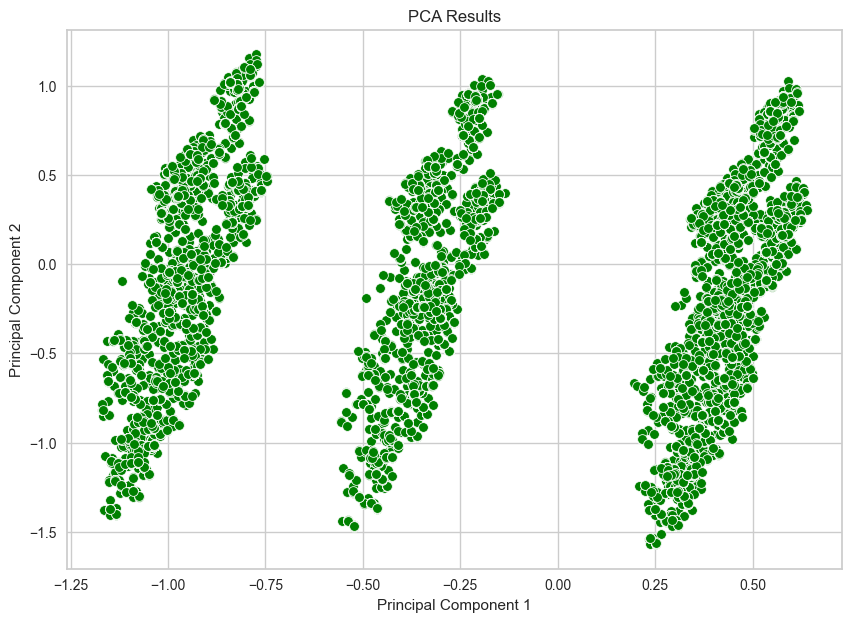

In [ ]:
X_pca_df2 = pd.DataFrame(X_pca2, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', data=X_pca_df2, color='green')
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


**3 PCs**

In [23]:
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(scaled_data)
X_pca_df3 = pd.DataFrame(X_pca3, columns=['PC1', 'PC2', 'PC3'])

# Interactive 3D Plot
fig = px.scatter_3d(X_pca_df3, x='PC1', y='PC2', z='PC3', color=X_pca_df3.index,  
                    title='Interactive 3D PCA Plot', color_continuous_scale='Greens', opacity=0.8)

fig.update_traces(marker=dict(size=7, line=dict(width=1, color='darkgreen')))
fig.update_layout(scene=dict(xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3'))

fig.show()

***N* PCs**

In [148]:
pca15 = PCA(n_components=15)
X_pca15 = pca15.fit_transform(scaled_data)

**Explained Variance Ratio by Principal Component**

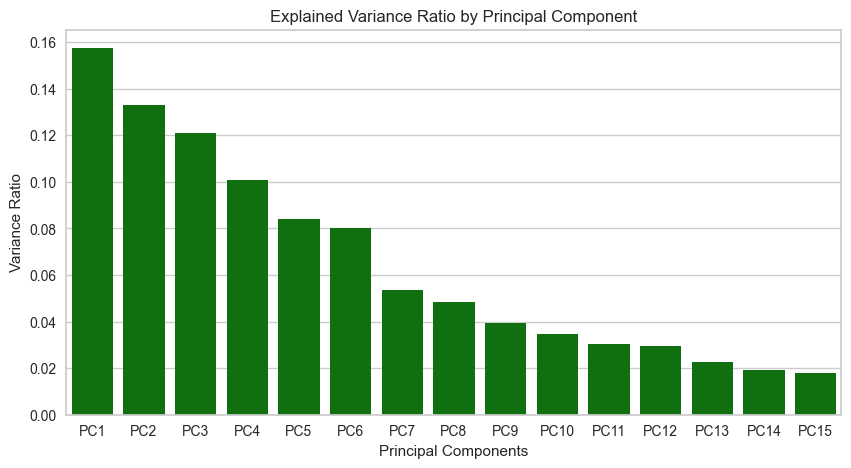

In [149]:
explained_variance = pca15.explained_variance_ratio_

plt.figure(figsize=(10, 5))
sns.barplot(x=[f'PC{i+1}' for i in range(len(explained_variance))], y=explained_variance, color='green')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Variance Ratio')
plt.show()


If a column has high absolute values in a component, that feature strongly influences that component.
We can determine which features contribute most to variance in the data.

In [150]:
# Create a dataframe with the weights per component
weights_df = pd.DataFrame(pca15.components_,columns=df.columns)
weights_df.T

0         1         2         3   \
RoomNights                   -0.000063  0.005134  0.000371  0.001836   
SRHighFloor                   0.015849  0.020459 -0.032421  0.023097   
SRCrib                       -0.004949 -0.004361 -0.013964  0.006760   
SRKingSizeBed                -0.018005  0.524079 -0.498740  0.516452   
SRTwinBed                    -0.014219 -0.036535  0.194332 -0.351188   
SRQuietRoom                   0.033885  0.082871 -0.038423  0.013898   
TotalRevenue                 -0.000541 -0.000118 -0.001390  0.004689   
RevenuePerNight              -0.000198 -0.006278 -0.002824  0.003679   
RevenuePerPersonNight        -0.001377 -0.011561 -0.003058  0.007165   
NumberOfSR                   -0.005373  0.126478 -0.088409  0.051376   
Foreigner                     0.013529  0.162163  0.030858 -0.042901   
LeadTimeCategory_Last-minute -0.025464 -0.123328  0.003645  0.062283   
LeadTimeCategory_Planner     -0.041070 -0.095148 -0.210187  0.167715   
AgeGroup_Senior               0.103746  0.402636  0.752679  0.320323   
AgeGroup_Young               -0.058228 -0.098901 -0.251202 -0.168875   
CustomerCategory_New         -0.610702  0.065147  0.033548 -0.006452   
CustomerCategory_Recent       0.773558 -0.096959 -0.094210  0.039849   
Continent_AS                  0.004562  0.011088 -0.006987  0.015946   
Continent_EU                  0.009901 -0.092555 -0.032565 -0.174992   
Continent_NA                 -0.016379  0.041389  0.033063  0.095326   
Continent_SA                  0.001262  0.032220  0.004400  0.042540   
DC_Corporate                 -0.007909 -0.073100  0.009431  0.041844   
DC_Direct                    -0.063052 -0.426892  0.084915  0.418843   
DC_Travel Agent/Operator      0.074638  0.515152 -0.092960 -0.469984   

                                    4         5         6         7   \
RoomNights                   -0.002453 -0.001063  0.016127 -0.012713   
SRHighFloor                  -0.019044 -0.006635  0.069108  0.081280   
SRCrib                       -0.004222 -0.004485  0.002680  0.004218   
SRKingSizeBed                -0.181428  0.092201  0.154795  0.237343   
SRTwinBed                     0.062355 -0.178055  0.430287  0.720920   
SRQuietRoom                   0.016930  0.012577  0.186223  0.042692   
TotalRevenue                 -0.004172 -0.007058  0.027675 -0.007819   
RevenuePerNight              -0.002028 -0.007434  0.016184  0.006385   
RevenuePerPersonNight         0.008411 -0.002609  0.002471 -0.002728   
NumberOfSR                   -0.036113 -0.024375  0.169149  0.264204   
Foreigner                     0.028430 -0.324339  0.552001 -0.529171   
LeadTimeCategory_Last-minute -0.253466  0.000719 -0.323798  0.175171   
LeadTimeCategory_Planner      0.919590  0.102718 -0.010238  0.067482   
AgeGroup_Senior               0.114448  0.158711  0.048804  0.009303   
AgeGroup_Young               -0.064170 -0.100439  0.203839 -0.067695   
CustomerCategory_New          0.019713 -0.077297  0.167451 -0.100846   
CustomerCategory_Recent       0.015825 -0.101460  0.154195 -0.040959   
Continent_AS                  0.038118 -0.180309 -0.072380  0.023330   
Continent_EU                 -0.087782  0.775039  0.298183 -0.081074   
Continent_NA                  0.023298 -0.358106 -0.128743  0.042574   
Continent_SA                  0.023013 -0.166432 -0.068236  0.014463   
DC_Corporate                  0.033852  0.022270 -0.075293  0.033798   
DC_Direct                    -0.122918 -0.039932  0.252238  0.027890   
DC_Travel Agent/Operator      0.078020  0.018590 -0.177328 -0.050845   

                                    8         9         10        11  \
RoomNights                   -0.000686 -0.003022 -0.004189 -0.017681   
SRHighFloor                  -0.015843  0.016703 -0.061247  0.034361   
SRCrib                       -0.020317 -0.002870  0.007550 -0.004667   
SRKingSizeBed                 0.016596 -0.104608  0.061091  0.016327   
SRTwinBed                    -0.052160 -0.114082  0.050795  0.079873   
SR

<div class="alert-danger">
  
este código em baixo faz o mesmo que em cima, soq apenas para um dos PCs de cada vez

In [29]:
comp = abs(weights_df.iloc[16])  ## index 14 is component 15
comp = comp.sort_values(ascending=False)
comp

SRCrib                          0.959443
NumberOfSR                      0.209274
TotalRevenue                    0.075217
PersonsNights                   0.073324
SRHighFloor                     0.072825
LodgingRevenue                  0.067687
SRKingSizeBed                   0.064002
SRTwinBed                       0.054735
RevenuePerNight                 0.053256
OtherRevenue                    0.051662
RevenuePerPersonNight           0.025890
AgeGroup_Senior                 0.019379
DC_Corporate                    0.017988
AgeGroup_Young                  0.014909
DC_Direct                       0.011115
Continent_SA                    0.011002
CustomerCategory_New            0.010289
LeadTimeCategory_Last-minute    0.009747
DC_Travel Agent/Operator        0.007024
BookingsCheckedIn               0.004907
CustomerCategory_Recent         0.003662
LeadTimeCategory_Planner        0.003204
Continent_AS                    0.003024
Foreigner                       0.002776
SRQuietRoom     

## 3.2 K-Means

<a href="#top">Top &#129033;</a>

**Elbow Method**

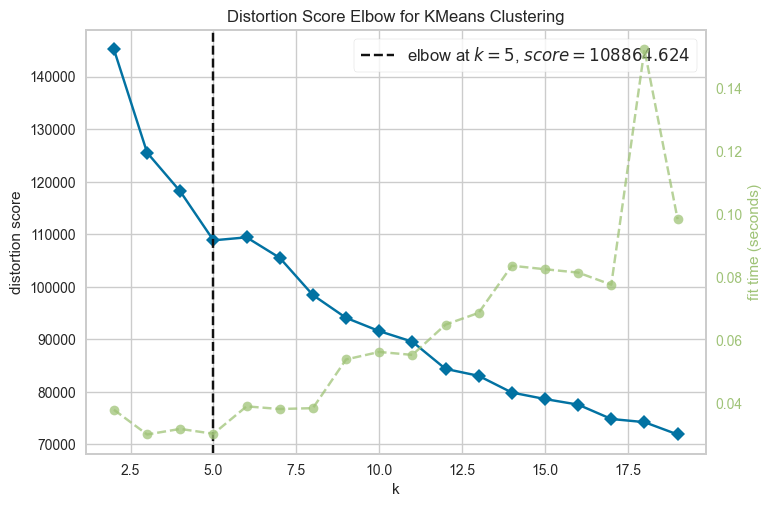

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [195]:
model = KMeans(random_state=36)
k=(2, 20)
color = 'green'

visualizer1 = KElbowVisualizer(model, k=k, color=color)
visualizer1.fit(X_pca15)
visualizer1.show()

**Final Model for K-Means on PCA**

In [ ]:
kmeans = KMeans(n_clusters = 6, random_state=41)
allDistances = kmeans.fit_transform(X_pca15)
km_labels = kmeans.fit_predict(X_pca15)

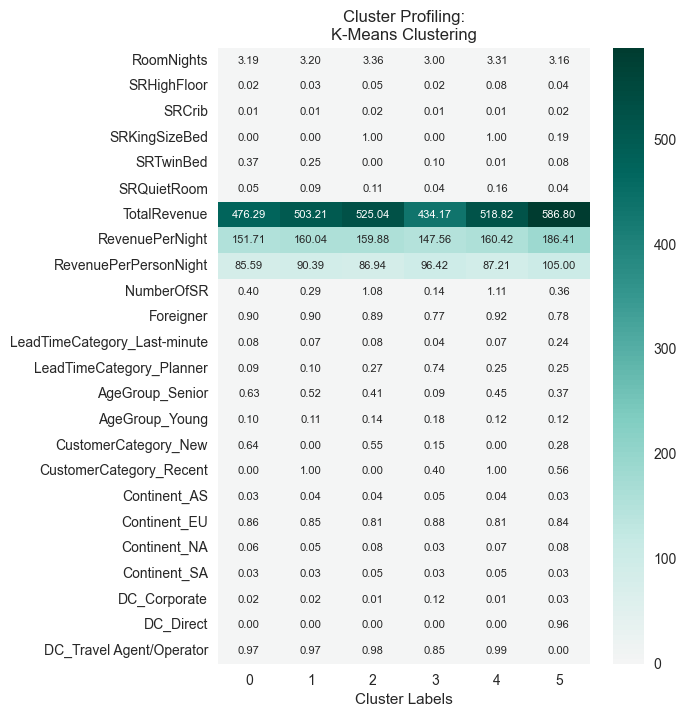

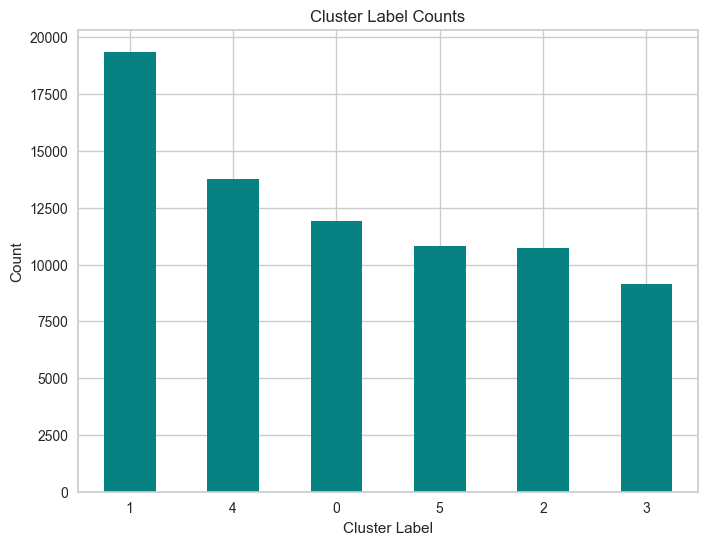

In [158]:
# Profiling and visualization
f.plot_cluster_profiling(df, km_labels, "K-Means", annot_size = 8)
f.plot_counts(km_labels)

In [196]:
kmeans = KMeans(n_clusters = 5, random_state=36)
allDistances = kmeans.fit_transform(X_pca15)
km_labels = kmeans.fit_predict(X_pca15)

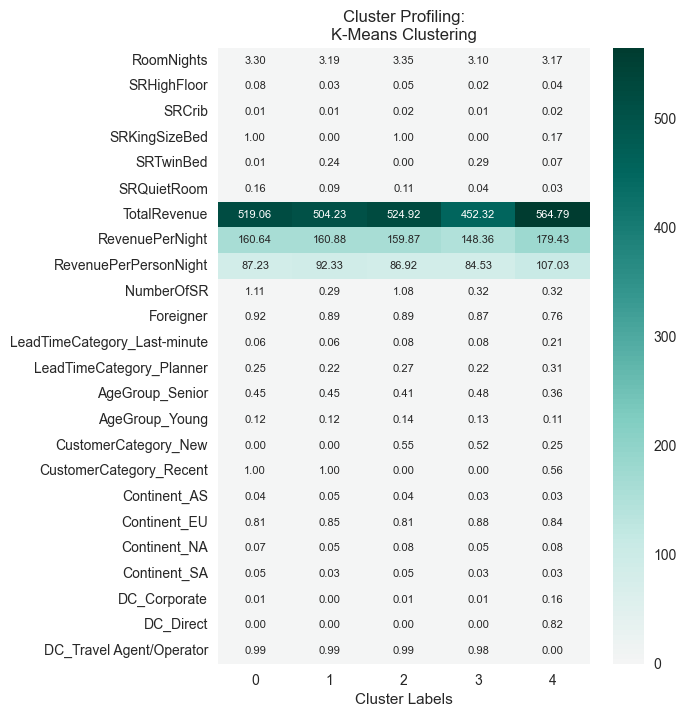

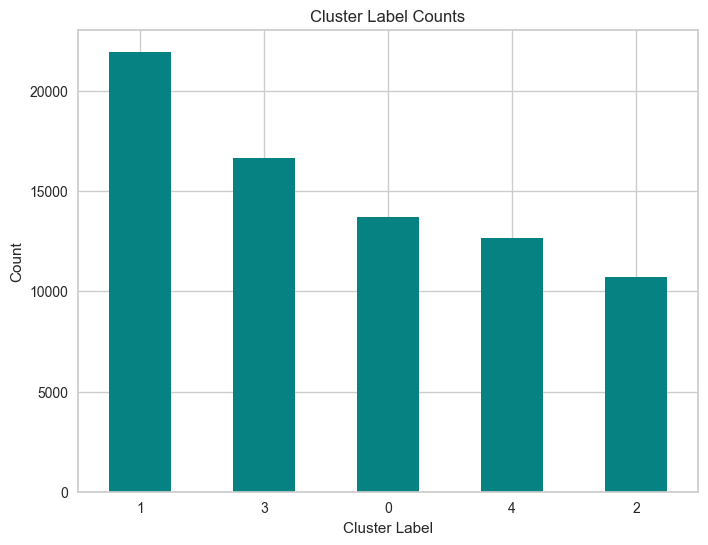

In [197]:
# Profiling and visualization
f.plot_cluster_profiling(df, km_labels, "K-Means", annot_size = 8)
f.plot_counts(km_labels)

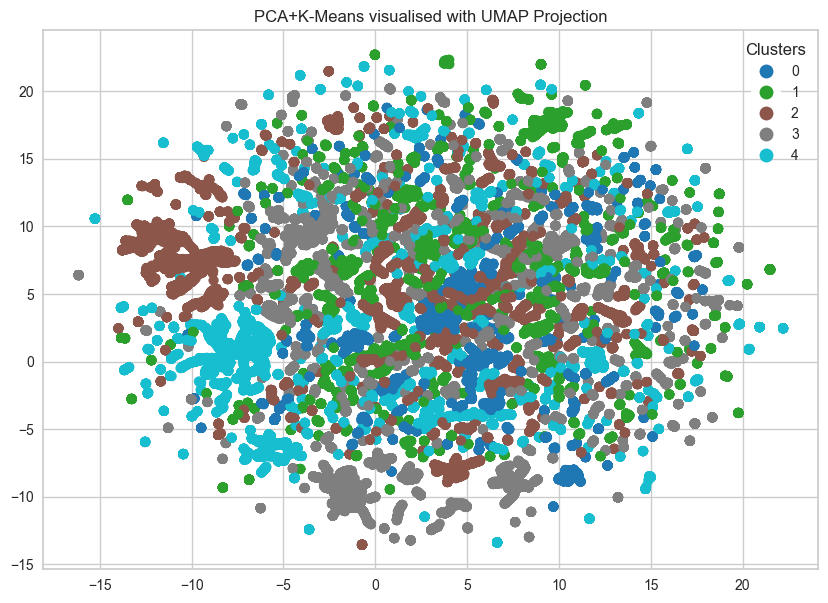

In [100]:
umap_object = umap.UMAP(n_neighbors = 10)
umap_embedding = umap_object.fit_transform(scaled_data)

f.plot_dim_reduction(umap_embedding, targets=km_labels, technique='PCA+K-Means visualised with UMAP')

## 3.3 DBSCAN

<a href="#top">Top &#129033;</a>

In [ ]:
# K-distance graph to determine the optimal eps value
neigh = NearestNeighbors(n_neighbors=50)
neigh.fit(X_pca17)
distances, _ = neigh.kneighbors(X_pca17)
distances = np.sort(distances[:, -1])

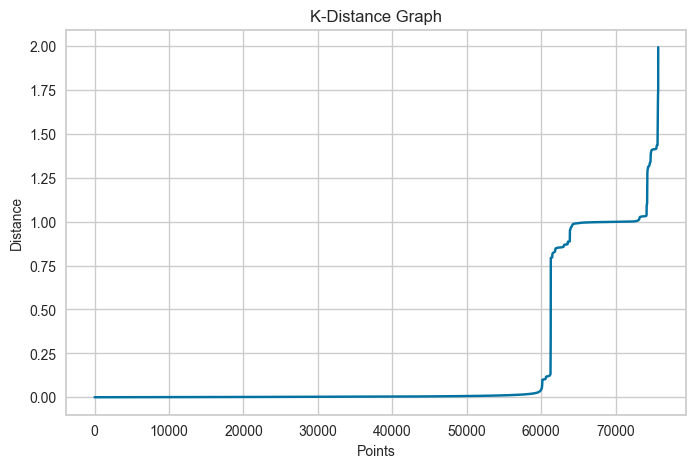

In [183]:
plt.figure(figsize=(8, 5))
plt.plot(distances)
#plt.axhline(y=1.25, color='red', linestyle='--', label='Potential eps')
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("K-Distance Graph")
plt.legend()
plt.show()

**Final Model for DBSCAN on PCA**

In [ ]:
eps_value = 0.05
dbscan = DBSCAN()
dbscan_labels = dbscan.fit_predict(X_pca17)

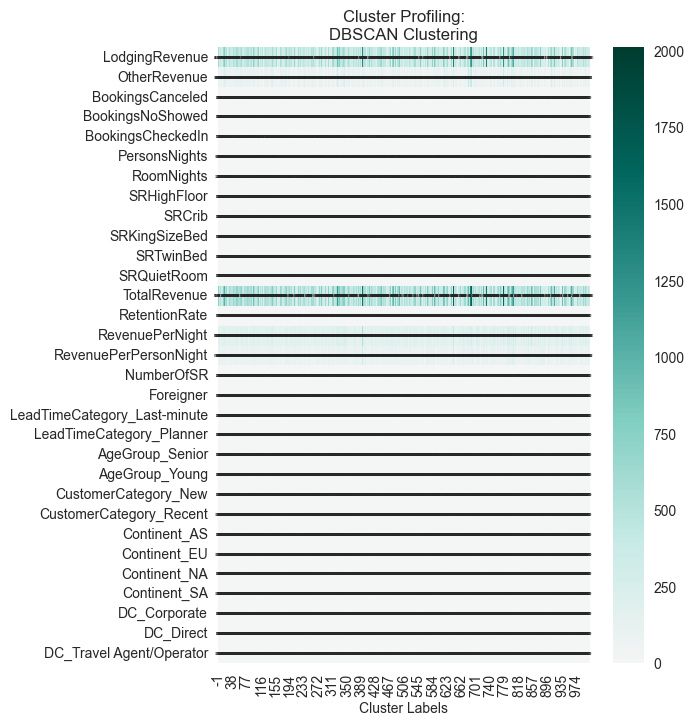

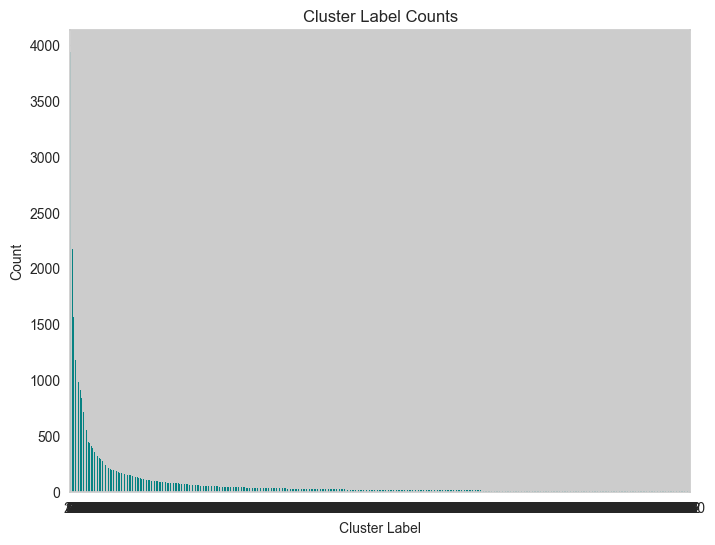

In [185]:
# Profiling and visualization
f.plot_cluster_profiling(df, dbscan_labels, "DBSCAN", annot_size = 2)
f.plot_counts(dbscan_labels)

# 4. Cluster Evaluation

<a href="#top">Top &#129033;</a>

### Quality of clustering

Before proceeding with further analysis, we need to validate that our clusters align with our expectations. This involves two key steps:  

1. **Visual Inspection:** we need to check whether the clusters make intuitive sense. Do examples that we consider similar fall into the same cluster? If not, we may need to reconsider our clustering approach or features, for instance.


2. **Quantitative Metrics:** we will evaluate our cluster quality using two metrics: 
- cluster cardinality: Cluster cardinality refers to the number of examples in each cluster. Very large or very small clusters might indicate issues, like one cluster capturing mostly noise.

- cluster magnitude: Measures the spread of a cluster, measured by the total distance of all points to the cluster center. Clusters with very high magnitude may contain more dispersed data points.

**Inter Cluster Distance**

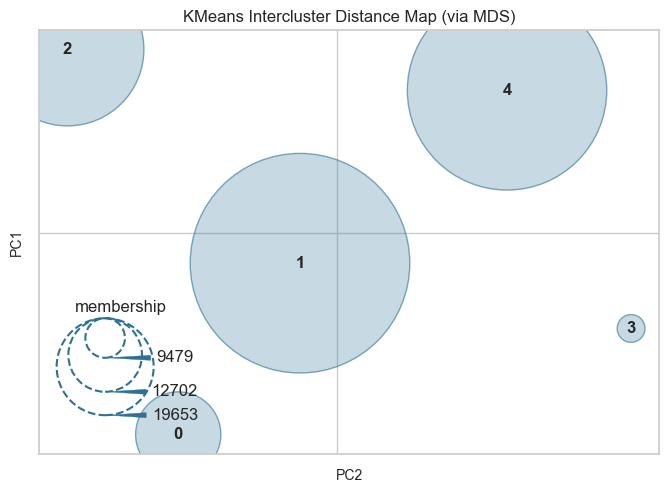

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [108]:
# Visualizing the clusters sizes and distances in 2D
visualizer = InterclusterDistance(kmeans)
visualizer.fit(X_pca11)
visualizer.show()

**Silhouette**

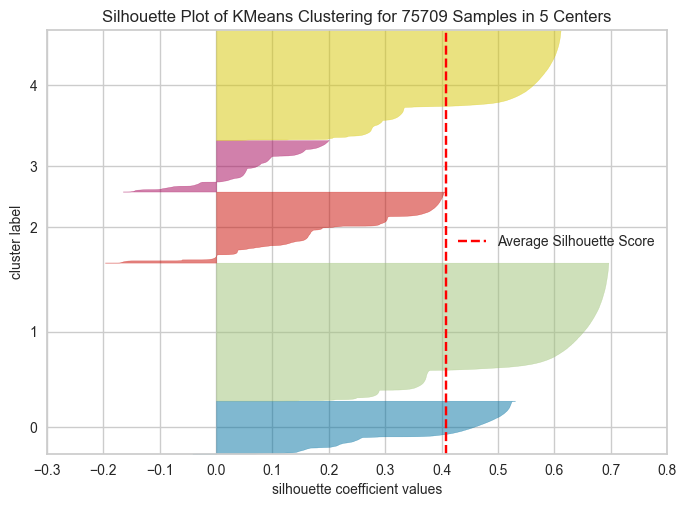

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 75709 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [109]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X_pca11)
visualizer.show()

Cluster Cardinality

In [110]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

plots_barTexts_fontSize = 8

from matplotlib import ticker

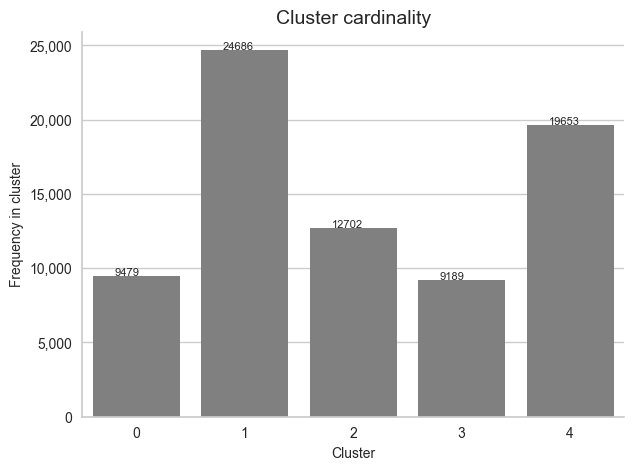

In [111]:
# Plot clusters cardinality 

# Count observations per cluster
freqByCluster = df.groupby(km_labels).size()

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.countplot(x=km_labels, color='grey')

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index,data in enumerate(freqByCluster):
    plt.text(x=index-0.2 , y=data+50 , s=f"{data}" , fontdict=dict(fontsize=plots_barTexts_fontSize))
sns.despine()
plt.title("Cluster cardinality", fontsize=plots_Title_fontSize)
plt.xlabel("Cluster")
plt.ylabel("Frequency in cluster")
plt.rc('axes', labelsize=subPlots_label_fontSize)

Cluster Magnitude

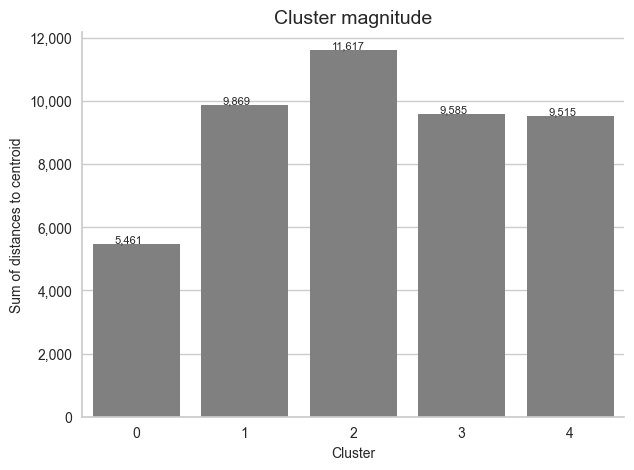

In [112]:
# Plot clusters magnitude

# Compute Magnitude
scaled_data['distanceToCentroid'] = np.min(allDistances,axis=1)
magnitude = scaled_data['distanceToCentroid'].groupby(km_labels).sum()
scaled_data = scaled_data.drop(columns=['distanceToCentroid'])

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.barplot(x=magnitude.index, y=magnitude.values, color='grey')

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index,data in enumerate(magnitude):
    plt.text(x=index-0.2 , y=data+50 , s=f"{data:,.0f}" , fontdict=dict(fontsize=plots_barTexts_fontSize))
sns.despine()
plt.title("Cluster magnitude", fontsize=plots_Title_fontSize)
plt.xlabel("Cluster")
plt.ylabel("Sum of distances to centroid")
plt.rc('axes', labelsize=subPlots_label_fontSize)

Magnitude versus cardinality

The Cardinality vs Magnitude plot compares cluster cardinality with cluster magnitude. Clusters with a higher cardinality tend to also have a higher cluster magnitude. Using this graph, we can identify anomalous clusters by looking for ones that are not very close to the 45-degree line.

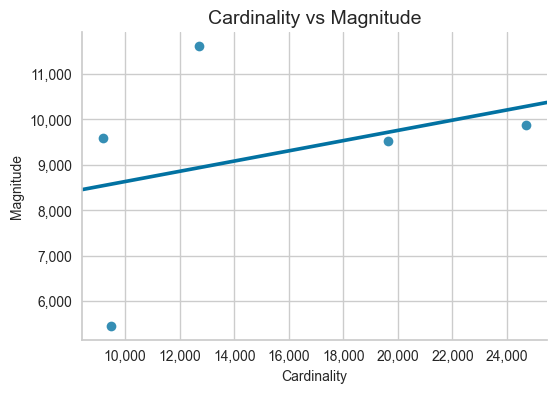

In [113]:
# Plot cardinality vs magnitude

# Draw
fig, ax = plt.subplots(figsize=(6,4))
g = sns.regplot(x=freqByCluster, y=magnitude, scatter=True, seed=123,truncate=False, ci=None)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Cardinality vs Magnitude", fontsize=plots_Title_fontSize)
plt.xlabel("Cardinality")
plt.ylabel("Magnitude")
plt.rc('axes', labelsize=subPlots_label_fontSize)

K-modes

In [114]:
scaled_data

Age  AverageLeadTime  RoomNights  SRHighFloor  SRCrib  \
0       0.594595         0.116576        0.04          0.0     0.0   
1       0.513514         0.025501        0.08          1.0     0.0   
4       0.500000         0.102004        0.00          0.0     0.0   
6       0.229730         0.003643        0.04          0.0     0.0   
7       0.202703         0.326047        0.02          0.0     0.0   
...          ...              ...         ...          ...     ...   
107621  0.081081         0.125683        0.02          0.0     0.0   
107622  0.513514         0.151184        0.04          0.0     0.0   
107624  0.337838         0.105647        0.02          0.0     0.0   
107625  0.040541         0.162113        0.12          0.0     0.0   
107627  0.594595         0.320583        0.06          0.0     0.0   

        SRKingSizeBed  SRTwinBed  SRQuietRoom  TotalRevenue  RevenuePerNight  \
0                 1.0        0.0          1.0      0.076226         0.105730   
1                 1.0        0.0          0.0      0.092261         0.076719   
4                 0.0        0.0          0.0      0.020451         0.085422   
6                 0.0        0.0          0.0      0.035743         0.049577   
7                 1.0        0.0          0.0      0.027074         0.056411   
...               ...        ...          ...           ...              ...   
107621            0.0        1.0          0.0      0.028236         0.058828   
107622            0.0        1.0          0.0      0.038334         0.053171   
107624            0.0        0.0          0.0      0.026842         0.055927   
107625            1.0        0.0          0.0      0.109424         0.064955   
107627            0.0        0.0          0.0      0.095956         0.099782   

        RevenuePerPersonNight  NumberOfSR  Foreigner  Continent_AS  \
0                    0.091302        0.25        1.0           0.0   
1                    0.066211        0.50        1.0           0.0   
4                    0.049066        0.00        1.0           0.0   
6                    0.085754        0.00        1.0           0.0   
7                    0.097575        0.25        1.0           0.0   
...                       ...         ...        ...           ...   
107621               0.050739        0.25        1.0           0.0   
107622               0.045846        0.25        1.0           0.0   
107624               0.096738        0.00        1.0           0.0   
107625               0.056038        0.25        1.0           0.0   
107627               0.057346        0.00        1.0           0.0   

        Continent_EU  Continent_NA  Continent_SA  DC_Corporate  DC_Direct  \
0                1.0           0.0           0.0           0.0        1.0   
1                1.0           0.0           0.0           0.0        0.0   
4                1.0           0.0           0.0           0.0        0.0   
6                1.0           0.0           0.0           0.0        0.0   
7                1.0           0.0           0.0           0.0        0.0   
...              ...           ...           ...           ...        ...   
107621           0.0           1.0           0.0           0.0        0.0   
107622           0.0           1.0           0.0           0.0        0.0   
107624           0.0           1.0           0.0           0.0        1.0   
107625           1.0           0.0           0.0           0.0        0.0   
107627           1.0           0.0           0.0           0.0        0.0   

        DC_Travel Agent/Operator  
0                            0.0  
1                            1.0  
4                            1.0  
6                            1.0  
7                            1.0  
...                          ...  
107621                       1.0  
107622                       1.0  
107624                       0.0  
107625                       1.0  
107627                       1.0  

[75709 rows x 20 columns

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes

# Define range for k
k_values = range(2, 9)  # From 2 to 20 clusters
costs = []

# Get categorical column indexes
categorical_columns = list(scaled_data.iloc[:, 6:11].columns) + list(scaled_data.iloc[:, 16:30].columns)
column_indexes_of_categorical_features = [scaled_data.columns.get_loc(col) for col in categorical_columns]

# Run K-Prototypes for different k values
for k in k_values:
    print(f"Fitting K-Prototypes for k={k}...")  # Print start
    kproto = KPrototypes(n_clusters=k, random_state=43)
    kproto.fit(scaled_data, categorical=column_indexes_of_categorical_features)
    cost = kproto.cost_
    costs.append(cost)
    print(f"Completed for k={k}, Cost: {cost}\n")  # Print completion

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, costs, marker='o', linestyle='-', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()

Fitting K-Prototypes for k=2...
Completed for k=2, Cost: 6722.690002685331

Fitting K-Prototypes for k=3...
Completed for k=3, Cost: 6190.337170963178

Fitting K-Prototypes for k=4...
Completed for k=4, Cost: 5797.486821166721

Fitting K-Prototypes for k=5...
Completed for k=5, Cost: 5394.717286403171

Fitting K-Prototypes for k=6...
Completed for k=6, Cost: 5124.973332015318

Fitting K-Prototypes for k=7...


KeyboardInterrupt: 

In [147]:
model = KPrototypes(random_state=43)
k=(2, 20)
color = 'green'

visualizer1 = KElbowVisualizer(model, k=k, color=color)
visualizer1.fit(scaled_data)
visualizer1.show()

NotImplementedError: No categorical data selected, effectively doing k-means. Present a list of categorical columns, or use scikit-learn's KMeans instead.

In [143]:
# Identify categorical feature indexes
categorical_columns = list(scaled_data.iloc[:, 6:11].columns) + list(scaled_data.iloc[:, 16:30].columns)

# Get column indexes
column_indexes_of_categorical_features = [scaled_data.columns.get_loc(col) for col in categorical_columns]

print(column_indexes_of_categorical_features)


[6, 7, 8, 9, 10, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [7]:
from kmodes.kprototypes import KPrototypes


In [145]:
from kmodes.kprototypes import KPrototypes
kproto = KPrototypes(n_clusters=5, random_state=43)
clusters = kproto.fit_predict(scaled_data, categorical=column_indexes_of_categorical_features)

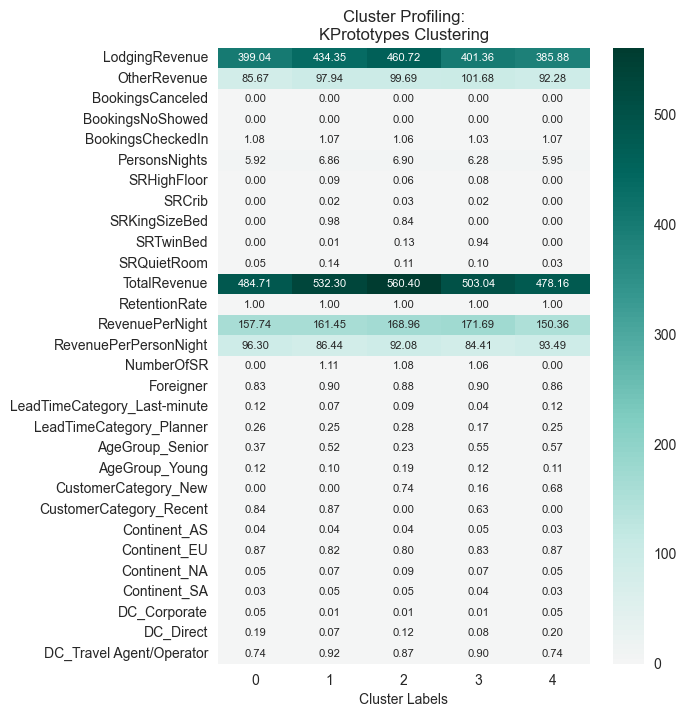

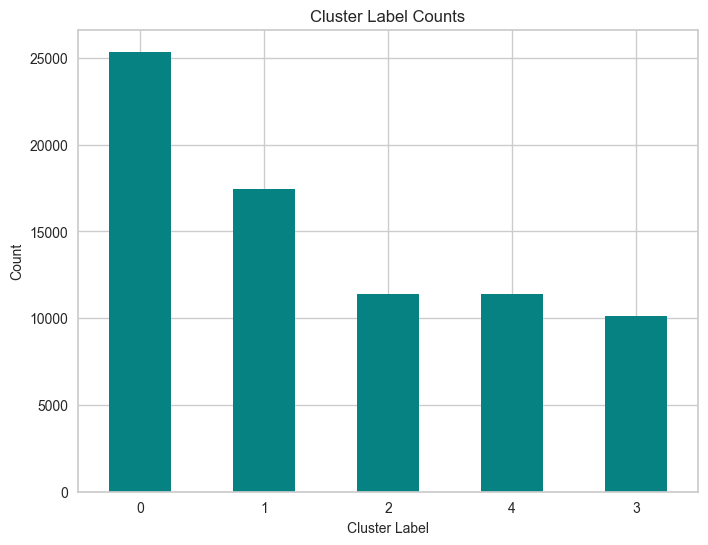

In [146]:
# Profiling and visualization
f.plot_cluster_profiling(df, clusters, "KPrototypes", annot_size = 8)
f.plot_counts(clusters)

In [ ]:
from kmodes.kmodes import KModes

km = KModes(n_clusters=5, init="Cao", n_init=5, random_state=500)
km_labels = km.fit_predict(binary_data)